# FINANCIAL RISK MANAGEMENT

In [1]:
#Importing Essential Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,cross_val_score,cross_val_predict
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

In [2]:
#Importing the dataset
data=pd.read_csv('german_credit_data.csv')
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,little,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


# Analyzing the dataset

In [3]:
data.shape

(1000, 11)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   818 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [5]:
data.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [6]:
#Dropping the 'Unnamed' column
data.drop(['Unnamed: 0'],axis=1,inplace=True)
data

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,little,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [7]:
data.head(15)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,little,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
5,35,male,1,free,NaN,NaN,9055,36,education,good
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good
7,35,male,3,rent,little,moderate,6948,36,car,good
8,61,male,1,own,rich,NaN,3059,12,radio/TV,good
9,28,male,3,own,little,moderate,5234,30,car,bad


# DATA VISUALIZATION

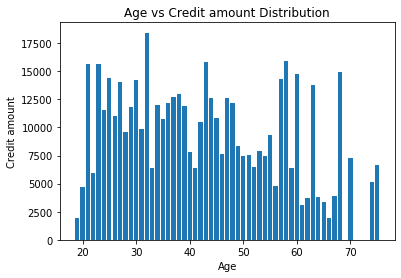

In [8]:
plt.bar(data['Age'],data["Credit amount"])
plt.xlabel("Age")
plt.ylabel("Credit amount")
plt.title("Age vs Credit amount Distribution")
plt.show()

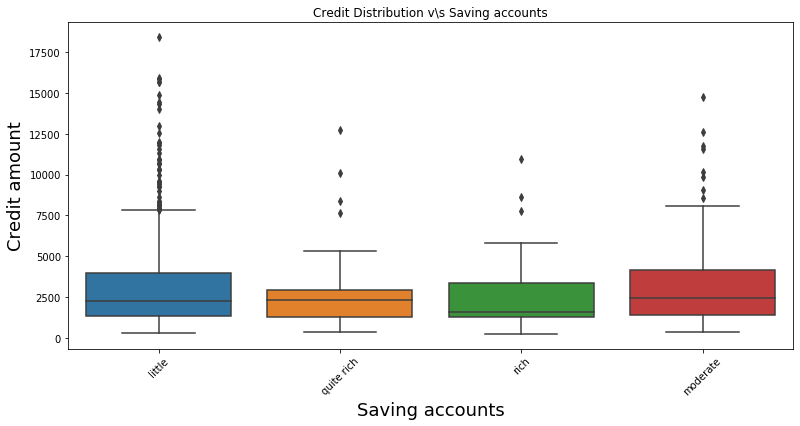

In [9]:
plt.figure(figsize=(13,6)) #figure size
g = sns.boxplot(x='Saving accounts', y='Credit amount', 
                   data=data)

g.set_title("Credit Distribution v\s Saving accounts")
g.set_xticklabels(g.get_xticklabels(),rotation=45) # It's the way to rotate the xticks when we use variable to our graphs
g.set_xlabel('Saving accounts', fontsize=18) # Xlabel
g.set_ylabel('Credit amount', fontsize=18) 
plt.show()

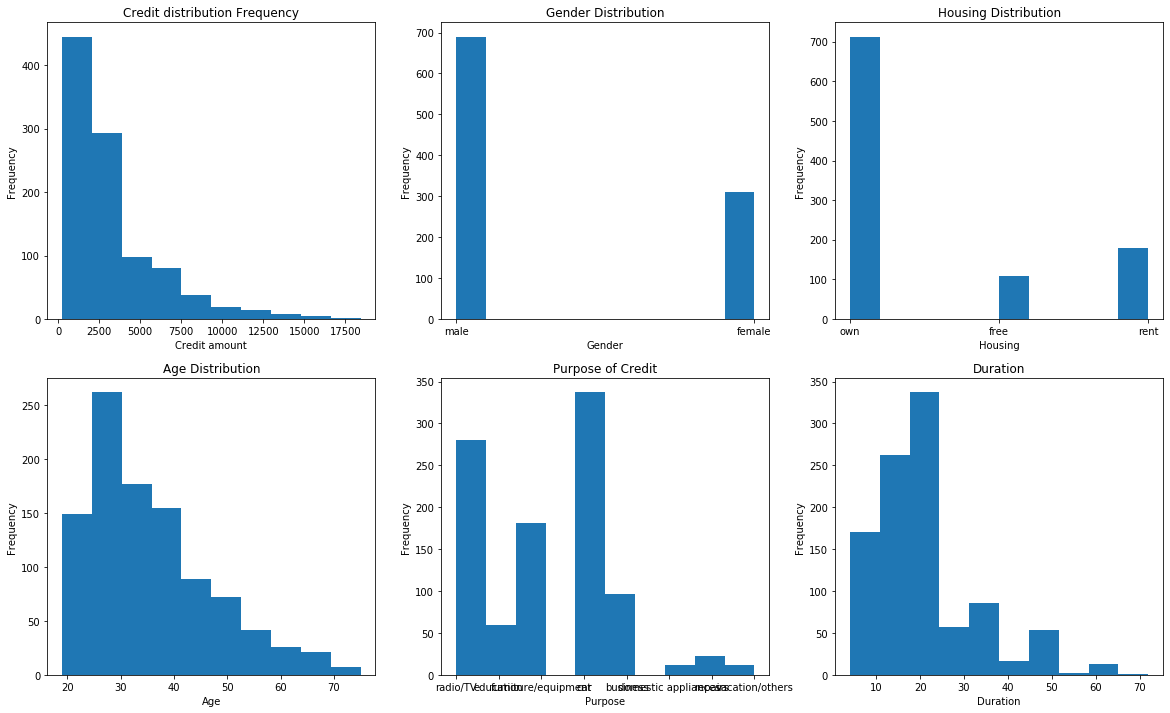

In [10]:
fig,a=plt.subplots(2,3,figsize=(20,12))


a[0,0].hist(data["Credit amount"])
a[0,0].set(xlabel="Credit amount")
a[0,0].set(ylabel="Frequency")
a[0,0].set(title="Credit distribution Frequency")

a[0,1].hist(data["Sex"])
a[0,1].set(xlabel="Gender")
a[0,1].set(ylabel="Frequency")
a[0,1].set(title="Gender Distribution")

a[0,2].hist(data["Housing"])
a[0,2].set(xlabel="Housing")
a[0,2].set(ylabel="Frequency")
a[0,2].set(title="Housing Distribution")

a[1,0].hist(data["Age"])
a[1,0].set(xlabel="Age")
a[1,0].set(ylabel="Frequency")
a[1,0].set(title="Age Distribution")

a[1,1].hist(data["Purpose"])
a[1,1].set(xlabel="Purpose")
a[1,1].set(ylabel="Frequency")
a[1,1].set(title="Purpose of Credit")


a[1,2].hist(data["Duration"])
a[1,2].set(xlabel="Duration")
a[1,2].set(ylabel="Frequency")
a[1,2].set(title="Duration")

plt.show()

Text(0.5, 0.98, 'Financial risk')

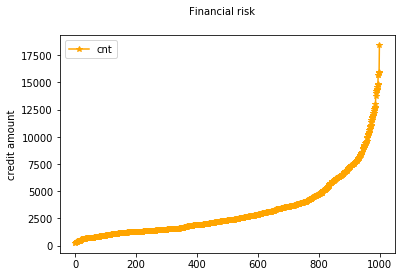

In [11]:
fig, ax = plt.subplots(1)
ax.plot(sorted(data['Credit amount']), color = 'orange', marker = '*', label='cnt')
ax.legend(loc= 'upper left')
ax.set_ylabel('credit amount', fontsize = 10)
fig.suptitle('Financial risk', fontsize = 10)

C:\Anaconda\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


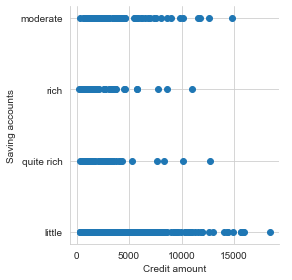

In [12]:
'''
plt.scatter(data['Credit amount'],data['Saving accounts'])
plt.xlabel('Credit amount')
plt.ylabel('Duration')
plt.title('Credit v\s Duration')
plt.show()
'''
sns.set_style("whitegrid")
sns.FacetGrid(data, size=4).map(plt.scatter, "Credit amount", "Saving accounts") \
   .add_legend()
plt.show()

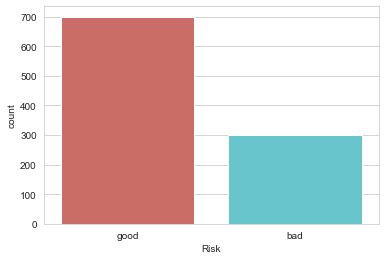

In [13]:
#Analysis of Target Variables
sns.countplot(x = 'Risk', data = data, palette = 'hls')
plt.show()

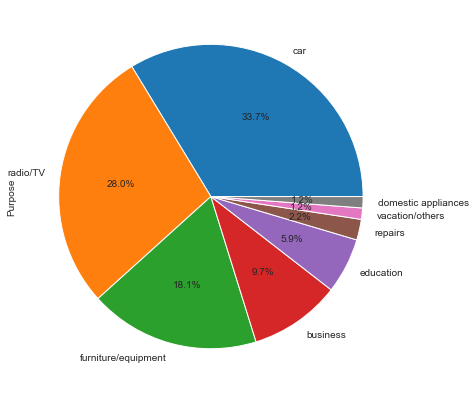

In [14]:
fig = plt.figure(figsize = (7,7))
data['Purpose'].value_counts().plot(kind = 'pie', autopct = '%.1f%%')

0      2
1      2
2      1
3      2
4      2
      ..
995    1
996    3
997    2
998    2
999    2
Name: Job, Length: 1000, dtype: int64
{2: 629, 1: 199, 3: 147, 0: 21}


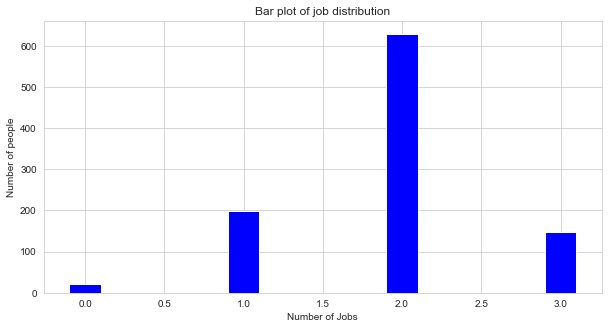

In [15]:
dic = {}
print(data['Job'])
for i in data['Job']:
    if i in dic:
        dic[i]+=1
    else:
        dic[i] =0
        
print(dic)
        
Job = list(dic.keys())
freq = list(dic.values())


fig = plt.figure(figsize = (10, 5)) 

plt.bar(Job, freq, color ='blue', 
		width = 0.2) 

plt.xlabel("Number of Jobs") 
plt.ylabel("Number of people") 
plt.title("Bar plot of job distribution") 
plt.show() 

0       own
1       own
2       own
3      free
4      free
       ... 
995     own
996     own
997     own
998    free
999     own
Name: Housing, Length: 1000, dtype: object
{'own': 712, 'free': 107, 'rent': 178}


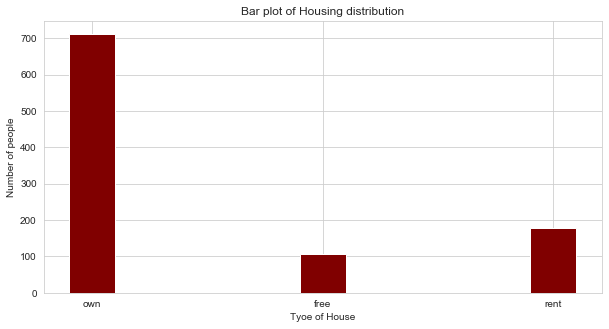

In [16]:
dic = {}
print(data['Housing'])
for i in data['Housing']:
    if i in dic:
        dic[i]+=1
    else:
        dic[i] =0
        
print(dic)
        
Housing= list(dic.keys())
freq = list(dic.values())


fig = plt.figure(figsize = (10, 5)) 

plt.bar(Housing, freq, color ='maroon', 
		width = 0.2) 

plt.xlabel("Tyoe of House") 
plt.ylabel("Number of people") 
plt.title("Bar plot of Housing distribution") 
plt.show() 

0                 radio/TV
1                 radio/TV
2                education
3      furniture/equipment
4                      car
              ...         
995    furniture/equipment
996                    car
997               radio/TV
998               radio/TV
999                    car
Name: Purpose, Length: 1000, dtype: object
{'radio/TV': 279, 'education': 58, 'furniture/equipment': 180, 'car': 336, 'business': 96, 'domestic appliances': 11, 'repairs': 21, 'vacation/others': 11}


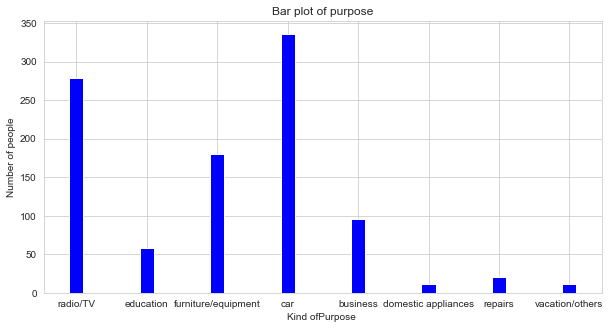

In [17]:
dic = {}
print(data['Purpose'])
for i in data['Purpose']:
    if i!='nan':
        if i in dic:
            dic[i]+=1
        else:
            dic[i] =0
        
print(dic)

        
Purpose = list(dic.keys())
freq = list(dic.values())


fig = plt.figure(figsize = (10, 5)) 

plt.bar(Purpose, freq, color ='blue', width = 0.2) 

plt.xlabel("Kind ofPurpose ") 
plt.ylabel("Number of people") 
plt.title("Bar plot of purpose") 
plt.show() 

In [18]:
#Correlation
data.corr()

,Age,Job,Credit amount,Duration
Age,1.000000,0.015673,0.032716,-0.036136
Job,0.015673,1.000000,0.285385,0.210910
Credit amount,0.032716,0.285385,1.000000,0.624984
Duration,-0.036136,0.210910,0.624984,1.000000


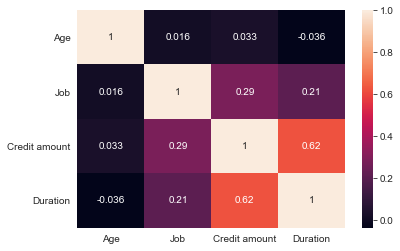

In [19]:
sns.heatmap(data.corr(),annot=True)

In [20]:
data['Housing'].unique()

array(['own', 'free', 'rent'], dtype=object)

In [21]:
data['Saving accounts'].unique()

array(['little', nan, 'quite rich', 'rich', 'moderate'], dtype=object)

In [22]:
data['Checking account'].unique()

array(['little', 'moderate', nan, 'rich'], dtype=object)

In [23]:
data['Purpose'].unique()

array(['radio/TV', 'education', 'furniture/equipment', 'car', 'business',
       'domestic appliances', 'repairs', 'vacation/others'], dtype=object)

In [24]:
# Separate majority and minority classes
df_majority = data[data.Risk=='good']
df_minority = data[data.Risk=='bad']
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=700,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df.Risk.value_counts()
# 1    576
# 0    576
# Name: balance, dtype: int64

good    700
bad     700
Name: Risk, dtype: int64

In [25]:
#Checking for missing values
df.isnull().any()

Age                 False
Sex                 False
Job                 False
Housing             False
Saving accounts      True
Checking account     True
Credit amount       False
Duration            False
Purpose             False
Risk                False
dtype: bool

In [26]:
#Filling the missing values
df['Saving accounts'].fillna(df['Saving accounts'].iloc[0],inplace=True)
df['Checking account'].fillna(df['Checking account'].iloc[0],inplace=True)

In [27]:
df.isnull().any()

Age                 False
Sex                 False
Job                 False
Housing             False
Saving accounts     False
Checking account    False
Credit amount       False
Duration            False
Purpose             False
Risk                False
dtype: bool

In [28]:
x=df.iloc[:,0:9].values
x

array([[67, 'male', 2, ..., 1169, 6, 'radio/TV'],
       [49, 'male', 1, ..., 2096, 12, 'education'],
       [45, 'male', 2, ..., 7882, 42, 'furniture/equipment'],
       ...,
       [23, 'female', 2, ..., 1442, 24, 'car'],
       [24, 'male', 2, ..., 9629, 36, 'car'],
       [28, 'female', 2, ..., 2631, 15, 'car']], dtype=object)

In [29]:
y = df.iloc[:,9:].values
y

array([['good'],
       ['good'],
       ['good'],
       ...,
       ['bad'],
       ['bad'],
       ['bad']], dtype=object)

In [30]:
#Shape before encoding
x.shape

(1400, 9)

# Label Encoding

In [31]:
lb= LabelEncoder()
x[:,1]=lb.fit_transform(x[:,1])
y=lb.fit_transform(y)
x

C:\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[67, 1, 2, ..., 1169, 6, 'radio/TV'],
       [49, 1, 1, ..., 2096, 12, 'education'],
       [45, 1, 2, ..., 7882, 42, 'furniture/equipment'],
       ...,
       [23, 0, 2, ..., 1442, 24, 'car'],
       [24, 1, 2, ..., 9629, 36, 'car'],
       [28, 0, 2, ..., 2631, 15, 'car']], dtype=object)

In [32]:
y

array([1, 1, 1, ..., 0, 0, 0])

# One Hot Encoding

In [33]:
#Saving Accounts
ct=ColumnTransformer([("on",OneHotEncoder(),[4])],remainder='passthrough')
x=ct.fit_transform(x)
x

array([[1.0, 0.0, 0.0, ..., 1169, 6, 'radio/TV'],
       [1.0, 0.0, 0.0, ..., 2096, 12, 'education'],
       [1.0, 0.0, 0.0, ..., 7882, 42, 'furniture/equipment'],
       ...,
       [1.0, 0.0, 0.0, ..., 1442, 24, 'car'],
       [1.0, 0.0, 0.0, ..., 9629, 36, 'car'],
       [0.0, 1.0, 0.0, ..., 2631, 15, 'car']], dtype=object)

In [34]:
#Removing the dummy variables
x=x[:,1:]
x

array([[0.0, 0.0, 0.0, ..., 1169, 6, 'radio/TV'],
       [0.0, 0.0, 0.0, ..., 2096, 12, 'education'],
       [0.0, 0.0, 0.0, ..., 7882, 42, 'furniture/equipment'],
       ...,
       [0.0, 0.0, 0.0, ..., 1442, 24, 'car'],
       [0.0, 0.0, 0.0, ..., 9629, 36, 'car'],
       [1.0, 0.0, 0.0, ..., 2631, 15, 'car']], dtype=object)

In [35]:
#Purpose
ct=ColumnTransformer([("on",OneHotEncoder(),[10])],remainder='passthrough')
x=ct.fit_transform(x)
x

array([[0.0, 0.0, 0.0, ..., 'little', 1169, 6],
       [0.0, 0.0, 0.0, ..., 'little', 2096, 12],
       [0.0, 0.0, 0.0, ..., 'little', 7882, 42],
       ...,
       [0.0, 1.0, 0.0, ..., 'little', 1442, 24],
       [0.0, 1.0, 0.0, ..., 'little', 9629, 36],
       [0.0, 1.0, 0.0, ..., 'moderate', 2631, 15]], dtype=object)

In [36]:
x=x[:,1:]
x

array([[0.0, 0.0, 0.0, ..., 'little', 1169, 6],
       [0.0, 0.0, 1.0, ..., 'little', 2096, 12],
       [0.0, 0.0, 0.0, ..., 'little', 7882, 42],
       ...,
       [1.0, 0.0, 0.0, ..., 'little', 1442, 24],
       [1.0, 0.0, 0.0, ..., 'little', 9629, 36],
       [1.0, 0.0, 0.0, ..., 'moderate', 2631, 15]], dtype=object)

In [37]:
#Housing
ct=ColumnTransformer([("on",OneHotEncoder(),[13])],remainder='passthrough')
x=ct.fit_transform(x)
x

array([[0.0, 1.0, 0.0, ..., 'little', 1169, 6],
       [0.0, 1.0, 0.0, ..., 'little', 2096, 12],
       [1.0, 0.0, 0.0, ..., 'little', 7882, 42],
       ...,
       [0.0, 0.0, 1.0, ..., 'little', 1442, 24],
       [0.0, 1.0, 0.0, ..., 'little', 9629, 36],
       [0.0, 0.0, 1.0, ..., 'moderate', 2631, 15]], dtype=object)

In [38]:
x=x[:,1:]
x

array([[1.0, 0.0, 0.0, ..., 'little', 1169, 6],
       [1.0, 0.0, 0.0, ..., 'little', 2096, 12],
       [0.0, 0.0, 0.0, ..., 'little', 7882, 42],
       ...,
       [0.0, 1.0, 1.0, ..., 'little', 1442, 24],
       [1.0, 0.0, 1.0, ..., 'little', 9629, 36],
       [0.0, 1.0, 1.0, ..., 'moderate', 2631, 15]], dtype=object)

In [39]:
x[0:10,0:]

array([[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 67,
        1, 2, 'little', 1169, 6],
       [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 49,
        1, 1, 'little', 2096, 12],
       [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 45,
        1, 2, 'little', 7882, 42],
       [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 35,
        1, 1, 'little', 9055, 36],
       [1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 53,
        1, 2, 'little', 2835, 24],
       [0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 35,
        1, 3, 'moderate', 6948, 36],
       [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 61,
        1, 1, 'little', 3059, 12],
       [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 22,
        0, 2, 'moderate', 1567, 12],
       [0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 28,
        0, 2, 'little', 1403, 15],
       [1.0, 0.0, 0.0, 0.0, 0.0, 0

In [40]:
#Checking Accounts
ct=ColumnTransformer([("on",OneHotEncoder(),[15])],remainder='passthrough')
x=ct.fit_transform(x)
x

array([[1.0, 0.0, 0.0, ..., 2, 1169, 6],
       [1.0, 0.0, 0.0, ..., 1, 2096, 12],
       [1.0, 0.0, 0.0, ..., 2, 7882, 42],
       ...,
       [1.0, 0.0, 0.0, ..., 2, 1442, 24],
       [1.0, 0.0, 0.0, ..., 2, 9629, 36],
       [0.0, 1.0, 0.0, ..., 2, 2631, 15]], dtype=object)

In [41]:
x=x[:,1:]
x

array([[0.0, 0.0, 1.0, ..., 2, 1169, 6],
       [0.0, 0.0, 1.0, ..., 1, 2096, 12],
       [0.0, 0.0, 0.0, ..., 2, 7882, 42],
       ...,
       [0.0, 0.0, 0.0, ..., 2, 1442, 24],
       [0.0, 0.0, 1.0, ..., 2, 9629, 36],
       [1.0, 0.0, 0.0, ..., 2, 2631, 15]], dtype=object)

In [42]:
x.shape

(1400, 19)

In [43]:
#For Checking Accounts
x[0:15,0:2]

array([[0.0, 0.0],
       [0.0, 0.0],
       [0.0, 0.0],
       [0.0, 0.0],
       [0.0, 0.0],
       [1.0, 0.0],
       [0.0, 0.0],
       [1.0, 0.0],
       [0.0, 0.0],
       [0.0, 0.0],
       [0.0, 0.0],
       [0.0, 0.0],
       [0.0, 0.0],
       [0.0, 0.0],
       [0.0, 0.0]], dtype=object)

In [44]:
#For Housing
x[0:15,2:4]

array([[1.0, 0.0],
       [1.0, 0.0],
       [0.0, 0.0],
       [0.0, 0.0],
       [1.0, 0.0],
       [0.0, 1.0],
       [1.0, 0.0],
       [1.0, 0.0],
       [0.0, 1.0],
       [1.0, 0.0],
       [1.0, 0.0],
       [1.0, 0.0],
       [1.0, 0.0],
       [0.0, 1.0],
       [0.0, 1.0]], dtype=object)

In [45]:
#For Purpose
x[0:15,4:11]

array([[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
       [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
       [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
       [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
       [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
       [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
       [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]], dtype=object)

In [46]:
#For Saving Account
x[0:15,11:14]

array([[0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0],
       [0.0, 1.0, 0.0],
       [0.0, 0.0, 0.0],
       [0.0, 0.0, 1.0],
       [0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0],
       [0.0, 1.0, 0.0],
       [0.0, 0.0, 0.0],
       [0.0, 1.0, 0.0],
       [0.0, 0.0, 0.0]], dtype=object)

# Splitting the dataset into test data and train data

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [48]:
x_train

array([[1.0, 0.0, 1.0, ..., 2, 1935, 24],
       [1.0, 0.0, 0.0, ..., 3, 9398, 36],
       [0.0, 0.0, 0.0, ..., 2, 1845, 15],
       ...,
       [0.0, 0.0, 1.0, ..., 1, 1647, 21],
       [0.0, 0.0, 1.0, ..., 2, 717, 24],
       [0.0, 1.0, 1.0, ..., 3, 2923, 21]], dtype=object)

In [49]:
x_test

array([[1.0, 0.0, 1.0, ..., 3, 4455, 36],
       [0.0, 0.0, 1.0, ..., 2, 2743, 28],
       [0.0, 0.0, 1.0, ..., 1, 2538, 24],
       ...,
       [1.0, 0.0, 1.0, ..., 2, 2503, 30],
       [0.0, 1.0, 1.0, ..., 2, 1347, 10],
       [1.0, 0.0, 1.0, ..., 3, 18424, 48]], dtype=object)

In [50]:
y_train

array([0, 0, 1, ..., 0, 1, 1])

In [51]:
y_test

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0])

# Applying Different Classification Models on the dataset 

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
pipe=Pipeline([('rescale',StandardScaler()),('classifier',KNeighborsClassifier())])

In [53]:
pipe.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('rescale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False)

In [54]:
y_pred=pipe.predict(x_test)
y_pred

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0])

In [55]:
from sklearn.metrics import accuracy_score
knn_accu=accuracy_score(y_test,y_pred)
knn_accu

0.6857142857142857

In [56]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
pipe=Pipeline([('rescale',StandardScaler()),('classofier',GaussianNB())])

In [57]:
pipe.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('rescale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classofier', GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)

In [58]:
y_pred=pipe.predict(x_test)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0])

In [59]:
from sklearn.metrics import accuracy_score
naive_bayes_accu=accuracy_score(y_test,y_pred)
naive_bayes_accu

0.5678571428571428

In [60]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler#Feature scaling
from sklearn.pipeline import Pipeline # Pipeline
pipe = Pipeline([
    ('rescale', StandardScaler()),
    ('classifier', SVC(kernel='rbf'))
])

In [61]:
pipe.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('rescale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [62]:
from joblib import dump

In [63]:
dump(pipe,'svm.save')

['svm.save']

In [64]:
y_pred=pipe.predict(x_test)
y_pred

array([0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0])

In [65]:
svm_accu=accuracy_score(y_test,y_pred)
svm_accu

0.7214285714285714

Text(0.5, 1.0, 'Accuracy of various classification algorithms')

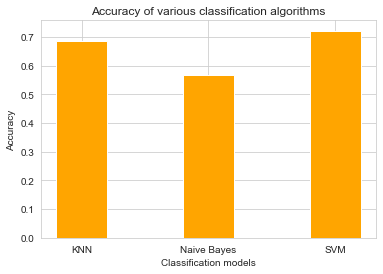

In [66]:
accu={'KNN':knn_accu,'Naive Bayes':naive_bayes_accu,'SVM':svm_accu}
models=accu.keys()
values=accu.values()
plt.bar(models,values,color='orange',width=0.4)
plt.xlabel('Classification models')
plt.ylabel('Accuracy')
plt.title('Accuracy of various classification algorithms')

The above bar plot shows that SVM has the highest accuracy(=72.14%)